In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk import WordNetLemmatizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer


os.getcwd()

'c:\\Users\\Rehan Ibrahim\\OneDrive - HEC Paris\\Desktop\\Capgemini Data\\Energy-Industry-NLP\\Data Preprocessing'

##### Additional Remarks on what could be improved:
- Almost every text has "date de l'experience" section at the end. We can remove it.
- Nu

### Read Data

In [2]:
toten = pd.read_csv("TotalEnergies_reviews.csv", index_col=0)
eni = pd.read_csv("eni_reviews.csv", index_col=0)

In [3]:
display(toten.head())

,text,grade,date
0,Service électricité très bien mais si…\r\nServ...,1,Il y a 9 heures
1,"Honteux\r\nHonteux, si je pouvais mettre zéro ...",1,Il y a un jour
2,incompréhension avec le service client…\r\ninc...,1,ll y a 2 jours
3,très satisfaite\r\nEn souscrivant en ligne je ...,5,Il y a un jour
4,Très bonne application\r\nTrès bonne applicati...,5,ll y a 5 jours


In [4]:
display(eni.head())

,text,grade,date
0,Catastrophe énergétique\r\nPremière souscripti...,1,Il y a 5 heures
1,Augmentation du prix de kWh X3\r\nAugmentation...,1,ll y a 4 jours
2,BRAQUEURS ENI\r\nSimplement : échéancier 2022 ...,1,ll y a 6 jours
3,Facture démentielle.\r\nFacture démentielle.\r...,1,ll y a 4 jours
4,A fuir !\r\nAyant un relevé tous les deux mois...,1,26 janv. 2023


In [5]:
eni.grade.mean()

1.035

In [6]:
toten.grade.mean()

3.01

In [7]:
#Merge 2 dataframes
eni["company"] = "eni"
toten["company"] = "total"
df = pd.concat([eni, toten], ignore_index=True)
print(df.shape)
df.sample(5)

(400, 4)


,text,grade,date,company
186,"AUX VOLEURS\r\nDu vol, 0,56 CTs le K/wH, rien ...",1,13 nov. 2022,eni
0,Catastrophe énergétique\r\nPremière souscripti...,1,Il y a 5 heures,eni
79,Ma mère s est retrouvé chez eni\r\nMa mère s e...,1,29 janv. 2022,eni
308,Je suis en attente d'un remboursement…\r\nJe s...,1,21 nov. 2022,total
131,ne jamais souscrire chez eux\r\nne jamais sous...,1,8 mars 2022,eni


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     400 non-null    object
 1   grade    400 non-null    int64 
 2   date     400 non-null    object
 3   company  400 non-null    object
dtypes: int64(1), object(3)
memory usage: 12.6+ KB


### Cleaning

In [9]:
#Check if date de l'experience doesn't exist
df["isDate"] = [df.text[i].find("Date de l'expérience:") for i in range(len(df))]
df[df.isDate == -1].isDate

Series([], Name: isDate, dtype: int64)

In [10]:
text_and_date = df.text.apply(lambda x:x.split("Date de l'expérience:"))
#text_and_date = df.apply(split_text(df.text, df.isDate))
df["text"] = [i[0] for i in text_and_date]
df["date"] = [i[1] for i in text_and_date]
df.drop("isDate", axis=1, inplace=True)

In [11]:
df.text[395]

'Rapide efficace et clair\r\n'

In [12]:
df.head()

,text,grade,date,company
0,Catastrophe énergétique\r\nPremière souscripti...,1,03 février 2023,eni
1,Augmentation du prix de kWh X3\r\nAugmentation...,1,24 janvier 2023,eni
2,BRAQUEURS ENI\r\nSimplement : échéancier 2022 ...,1,26 janvier 2023,eni
3,Facture démentielle.\r\nFacture démentielle.\r...,1,31 janvier 2023,eni
4,A fuir !\r\nAyant un relevé tous les deux mois...,1,08 janvier 2023,eni


### Visualizations

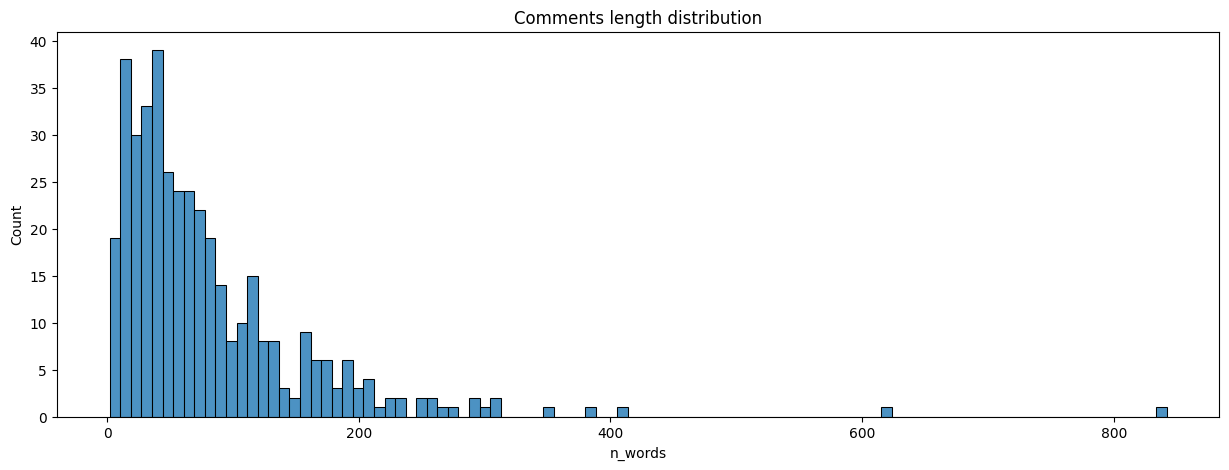

In [13]:
#Density plot of word frequency
df["n_words"] = df['text'].str.split().apply(len).astype(int)
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(df['n_words'], bins=100, alpha=0.8)
plt.title('Comments length distribution')
plt.show()

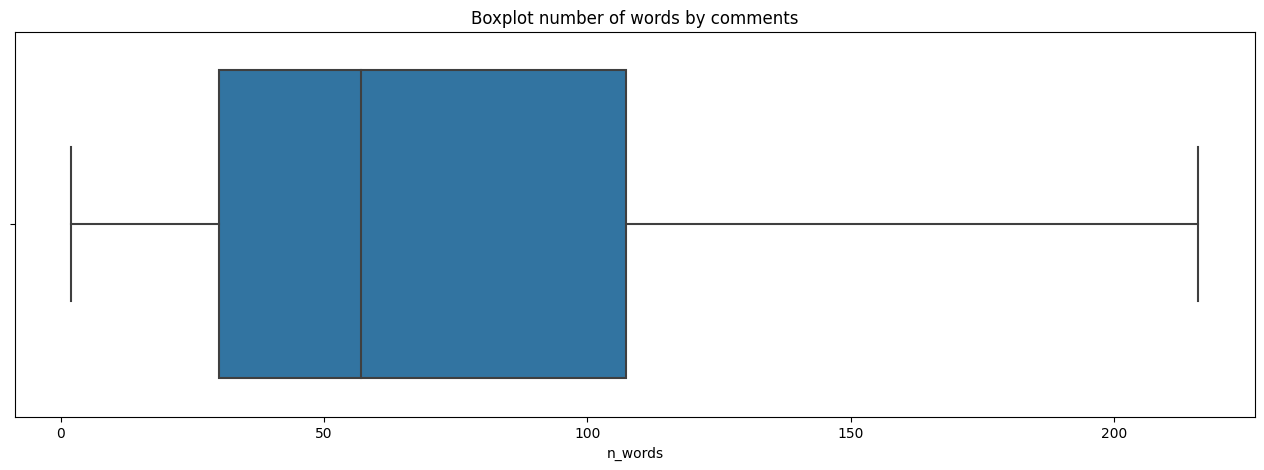

In [14]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(x=df['n_words'], showfliers=False)
plt.title('Boxplot number of words by comments')
plt.show()

### Date Visualizations 
Date formatting incomplete

In [15]:
#Format dates
df.date

0        03 février 2023
1        24 janvier 2023
2        26 janvier 2023
3        31 janvier 2023
4        08 janvier 2023
             ...        
395     08 novembre 2022
396     04 novembre 2022
397      24 octobre 2022
398      28 octobre 2022
399      26 octobre 2022
Name: date, Length: 400, dtype: object

In [16]:
#def date_format(date_series):
first_char = df.date.apply(lambda x:x[0])
df.loc[first_char[first_char == "A"].index]

,text,grade,date,company,n_words


In [17]:
import calendar
month_index = list(calendar.month_name)[1:]
month_index

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

### Text Formatting

In [18]:
corpus = df['text'].tolist()
corpus[:3]

["Catastrophe énergétique\r\nPremière souscription avec eux en 2021 :\r\npour la première année aucune régularisation en 2022 à faire montant annuel 880 euros\r\ndeuxième année 2022 facture de régularisation en 2023 de 1137 euros pour un montant total de consommation de 1880 euros.\r\nJ'ai essayé de vérifier ma consommation sur mon espace client, je remarque que les données affichées ne sont pas cohérentes (dans un mois de l'année j'étais en vacances, il n'y avait personne à la maison et tout les appareils était éteints).\r\n\r\nJ'ai appelé le service client le 01/02/2023 pour avoir des explications, la conseillère me dis qu'elle n'a pas plus de visibilité sur mon dossier, elle a demandé l'intervention d'un autre service qui au jour d'aujourd'hui ne m'a pas rappelé.\r\n\r\nUne catastrophe totale, je regrette d'avoir choisi ENI\r\n",
 "Augmentation du prix de kWh X3\r\nAugmentation du prix de kWh X3.\r\nLes 4 derniers mois équivalent à 1an de consommation habituelle.\r\nAucune communica

In [19]:
corpus = [comment.lower() for comment in corpus]
corpus[:3]

["catastrophe énergétique\r\npremière souscription avec eux en 2021 :\r\npour la première année aucune régularisation en 2022 à faire montant annuel 880 euros\r\ndeuxième année 2022 facture de régularisation en 2023 de 1137 euros pour un montant total de consommation de 1880 euros.\r\nj'ai essayé de vérifier ma consommation sur mon espace client, je remarque que les données affichées ne sont pas cohérentes (dans un mois de l'année j'étais en vacances, il n'y avait personne à la maison et tout les appareils était éteints).\r\n\r\nj'ai appelé le service client le 01/02/2023 pour avoir des explications, la conseillère me dis qu'elle n'a pas plus de visibilité sur mon dossier, elle a demandé l'intervention d'un autre service qui au jour d'aujourd'hui ne m'a pas rappelé.\r\n\r\nune catastrophe totale, je regrette d'avoir choisi eni\r\n",
 "augmentation du prix de kwh x3\r\naugmentation du prix de kwh x3.\r\nles 4 derniers mois équivalent à 1an de consommation habituelle.\r\naucune communica

In [20]:
from gensim.parsing.preprocessing import remove_stopwords
import unidecode


def clean_sentence(sentence, stopwords=False):
    sentence = sentence.lower().strip() #lowercase
    sentence = unidecode.unidecode(sentence) #remove accents from letters
    sentence = re.sub(r'[^a-z0-9\s]', '', sentence) #remove non-alphanumeric characters
    sentence = re.sub(r"\d+", "", sentence) #remove numbers
    sentence = re.sub(r"\s+"," ",sentence) #remove whitespace
    sentence = sentence.rstrip().lstrip() #remove space at the beginning and end if it exists
    
    return sentence

df["clean_text"] = df.text.apply(clean_sentence)
df.clean_text[:3]

0    catastrophe energetique premiere souscription ...
1    augmentation du prix de kwh x augmentation du ...
2    braqueurs eni simplement echeancier mois pour ...
Name: clean_text, dtype: object

In [21]:
df.clean_text[1]

'augmentation du prix de kwh x augmentation du prix de kwh x les derniers mois equivalent a an de consommation habituelle aucune communication de lentreprise impossible de les avoirs au telephone et aucunes reponses au mail un recours est lance par recommande et le mediateur de lenergie sera mandate au besoin pire entreprise denergie fuyez'

In [22]:
df.text[1]

"Augmentation du prix de kWh X3\r\nAugmentation du prix de kWh X3.\r\nLes 4 derniers mois équivalent à 1an de consommation habituelle.\r\nAucune communication de l'entreprise. Impossible de les avoirs au téléphone et aucunes réponses au mail.\r\nUn recours est lancé par recommandé et le médiateur de l'énergie sera mandaté au besoin.\r\nPire entreprise d'énergie.\r\nFuyez !\r\n"

In [23]:
tokenized_corpus = [re.split('\s+', comment) for comment in df.clean_text]
#print(len(tokenized_corpus))
print(tokenized_corpus[0])
df["tokenized_text"] = tokenized_corpus

['catastrophe', 'energetique', 'premiere', 'souscription', 'avec', 'eux', 'en', 'pour', 'la', 'premiere', 'annee', 'aucune', 'regularisation', 'en', 'a', 'faire', 'montant', 'annuel', 'euros', 'deuxieme', 'annee', 'facture', 'de', 'regularisation', 'en', 'de', 'euros', 'pour', 'un', 'montant', 'total', 'de', 'consommation', 'de', 'euros', 'jai', 'essaye', 'de', 'verifier', 'ma', 'consommation', 'sur', 'mon', 'espace', 'client', 'je', 'remarque', 'que', 'les', 'donnees', 'affichees', 'ne', 'sont', 'pas', 'coherentes', 'dans', 'un', 'mois', 'de', 'lannee', 'jetais', 'en', 'vacances', 'il', 'ny', 'avait', 'personne', 'a', 'la', 'maison', 'et', 'tout', 'les', 'appareils', 'etait', 'eteints', 'jai', 'appele', 'le', 'service', 'client', 'le', 'pour', 'avoir', 'des', 'explications', 'la', 'conseillere', 'me', 'dis', 'quelle', 'na', 'pas', 'plus', 'de', 'visibilite', 'sur', 'mon', 'dossier', 'elle', 'a', 'demande', 'lintervention', 'dun', 'autre', 'service', 'qui', 'au', 'jour', 'daujourdhui',

### Remove Stopwords

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Rehan
[nltk_data]     Ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stop_words = nltk.corpus.stopwords.words("french")
stop_words = [unidecode.unidecode(stopword) for stopword in stop_words]
print(stop_words)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'meme', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'a', 'm', 'n', 's', 't', 'y', 'ete', 'etee', 'etees', 'etes', 'etant', 'etante', 'etants', 'etantes', 'suis', 'es', 'est', 'sommes', 'etes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'etais', 'etait', 'etions', 'etiez', 'etaient', 'fus', 'fut', 'fumes', 'futes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fut', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [26]:
tokenized_wo_stopwords = [[token for token in sentence if token not in stop_words] for sentence in tokenized_corpus]
print(tokenized_wo_stopwords[0])
df["tokenized_text"] = tokenized_wo_stopwords

['catastrophe', 'energetique', 'premiere', 'souscription', 'premiere', 'annee', 'aucune', 'regularisation', 'faire', 'montant', 'annuel', 'euros', 'deuxieme', 'annee', 'facture', 'regularisation', 'euros', 'montant', 'total', 'consommation', 'euros', 'jai', 'essaye', 'verifier', 'consommation', 'espace', 'client', 'remarque', 'donnees', 'affichees', 'coherentes', 'mois', 'lannee', 'jetais', 'vacances', 'ny', 'personne', 'maison', 'tout', 'appareils', 'eteints', 'jai', 'appele', 'service', 'client', 'avoir', 'explications', 'conseillere', 'dis', 'quelle', 'na', 'plus', 'visibilite', 'dossier', 'demande', 'lintervention', 'dun', 'autre', 'service', 'jour', 'daujourdhui', 'rappele', 'catastrophe', 'totale', 'regrette', 'davoir', 'choisi', 'eni']


### Defining n-grams

In [27]:
# unigram
df.tokenized_text

0      [catastrophe, energetique, premiere, souscript...
1      [augmentation, prix, kwh, x, augmentation, pri...
2      [braqueurs, eni, simplement, echeancier, mois,...
3      [facture, dementielle, facture, dementielle, p...
4      [fuir, releve, tous, deux, mois, consommation,...
                             ...                        
395                            [rapide, efficace, clair]
396    [souscription, total, energie, explicite, donc...
397                                 [bien, cordialement]
398                                    [aucun, probleme]
399                                    [aucun, probleme]
Name: tokenized_text, Length: 400, dtype: object

In [28]:
#bigram
df["bigrams"] = [nltk.bigrams(i) for i in df.tokenized_text]
df["bigrams"] = [[i for i in item] for item in df.bigrams] 
df.bigrams

0      [(catastrophe, energetique), (energetique, pre...
1      [(augmentation, prix), (prix, kwh), (kwh, x), ...
2      [(braqueurs, eni), (eni, simplement), (simplem...
3      [(facture, dementielle), (dementielle, facture...
4      [(fuir, releve), (releve, tous), (tous, deux),...
                             ...                        
395              [(rapide, efficace), (efficace, clair)]
396    [(souscription, total), (total, energie), (ene...
397                               [(bien, cordialement)]
398                                  [(aucun, probleme)]
399                                  [(aucun, probleme)]
Name: bigrams, Length: 400, dtype: object

In [29]:
df["trigrams"] = [nltk.trigrams(i) for i in df.tokenized_text]
df["trigrams"] = [[i for i in item] for item in df.trigrams] 
df.trigrams

0      [(catastrophe, energetique, premiere), (energe...
1      [(augmentation, prix, kwh), (prix, kwh, x), (k...
2      [(braqueurs, eni, simplement), (eni, simplemen...
3      [(facture, dementielle, facture), (dementielle...
4      [(fuir, releve, tous), (releve, tous, deux), (...
                             ...                        
395                          [(rapide, efficace, clair)]
396    [(souscription, total, energie), (total, energ...
397                                                   []
398                                                   []
399                                                   []
Name: trigrams, Length: 400, dtype: object

### Term Frequency

In [30]:
wordSet = set().union(*df.tokenized_text)
len(wordSet)

3874

In [31]:
wordDict = []

for i in range(len(df.tokenized_text)):
    wordDict.append(dict.fromkeys(wordSet, 0))


In [32]:
for i, sent in enumerate(df.tokenized_text): 
    for word in sent:
        wordDict[i][word]+=1

In [33]:
#assign word_dict to dataframe, useful for the computations later 
word_df = pd.DataFrame(wordDict)

In [34]:
#length of phrases (check if the dict is correct)
word_df[word_df == 1].sum(axis=1)

0      47.0
1      26.0
2      13.0
3      57.0
4      19.0
       ... 
395     3.0
396     6.0
397     2.0
398     2.0
399     2.0
Length: 400, dtype: float64

In [35]:
df["wordDict"] = wordDict

In [36]:
#check for blank words
try:
    df["empt"] = [i[""] for i in df.wordDict]
    empt = df[df.empt != 0]
except:
    print("no empty words")

no empty words


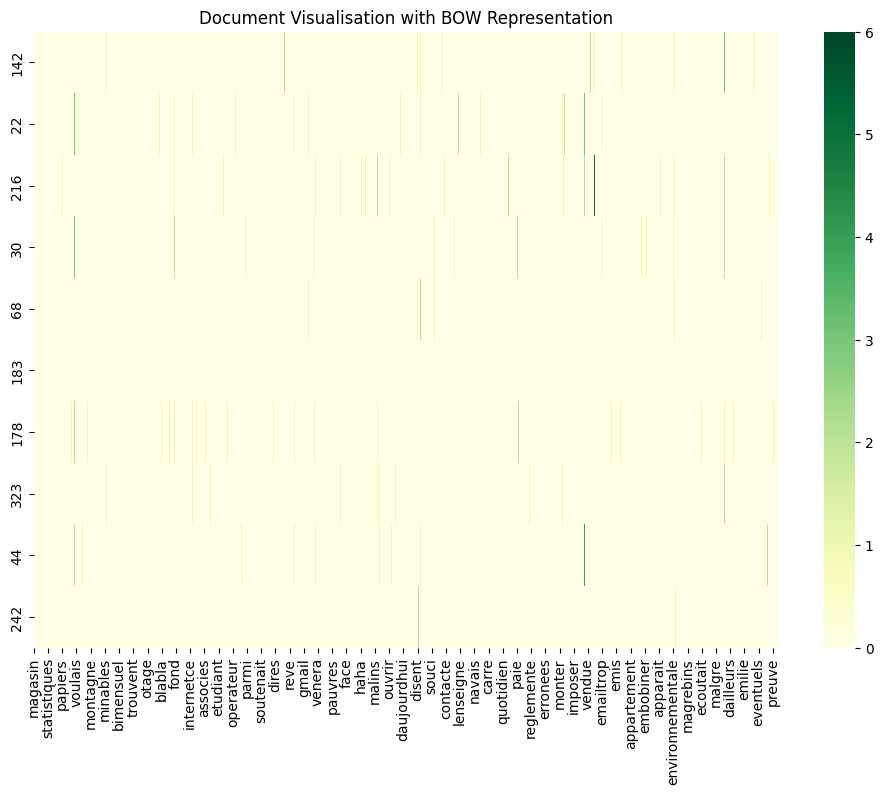

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(word_df.sample(10), cmap='YlGn')
plt.title('Document Visualisation with BOW Representation')
plt.show()

In [38]:
df_mean = word_df.mean().sort_values(ascending=False).to_frame(name='occurence mean')

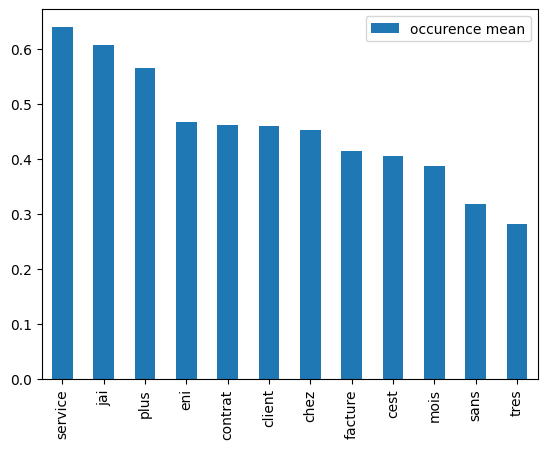

In [39]:
df_mean[:12].plot.bar()
plt.show()

In [40]:
def compute_TF(wordDict, tokens):
    tfDict = {}
    bowCount = len(tokens)
    for word, count in wordDict.items():
        if bowCount>0:
            tfDict[word] = count/float(bowCount)
        else:
            tfDict[word] = 0
    return tfDict

df["tfBOW"] = [compute_TF(wordDict=df.wordDict[i], tokens=df.tokenized_text[i])
                  for i in range(len(df))]

In [41]:
df.tfBOW

0      {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...
1      {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...
2      {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...
3      {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...
4      {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...
                             ...                        
395    {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...
396    {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...
397    {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...
398    {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...
399    {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...
Name: tfBOW, Length: 400, dtype: object

In [42]:
import math
def compute_IDF(wordDict):
    idfDict = {}
    N = len(wordDict)
    idfDict = dict.fromkeys(wordDict[0].keys(), 0)
    #print(idfDict)
    for doc in wordDict:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1 #if the word is in the document
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
#         idfDict[word] = N / float(val)
# Now there are few other problems with the IDF, in case of a large corpus,
# say 10,000, the IDF value explodes. So to dampen the effect we take log of IDF.
    return idfDict

IDF = compute_IDF(wordDict=df.wordDict)

In [43]:
def compute_TFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

df["tfIDF"] = [compute_TFIDF(df.tfBOW[i], IDF) for i in range(len(df))]

In [44]:
df.tfIDF

0      {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...
1      {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...
2      {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...
3      {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...
4      {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...
                             ...                        
395    {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...
396    {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...
397    {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...
398    {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...
399    {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...
Name: tfIDF, Length: 400, dtype: object

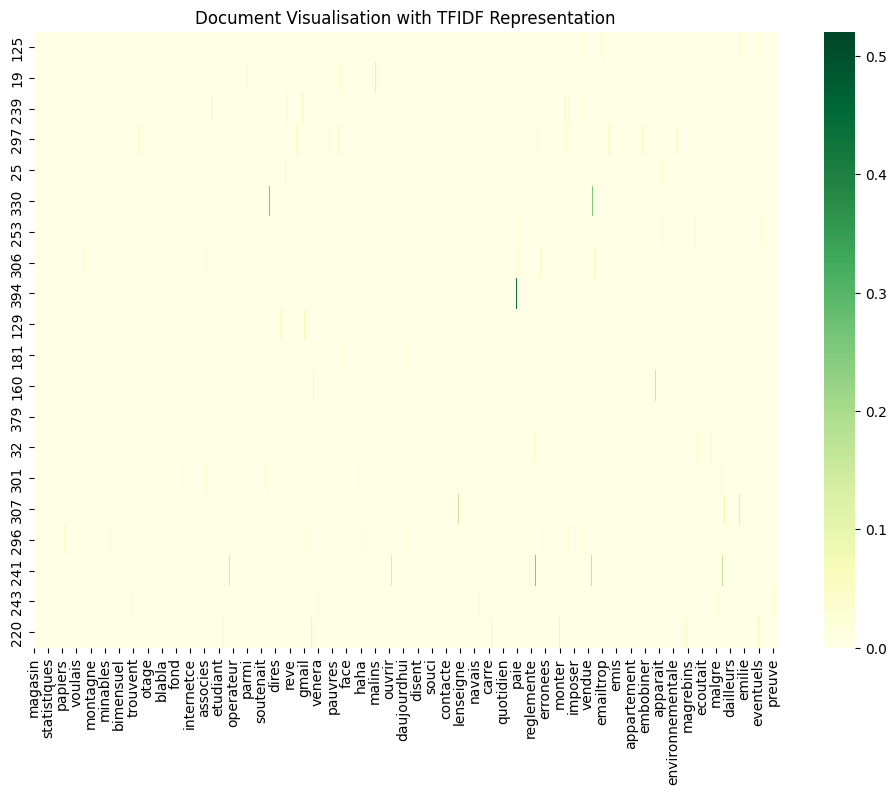

In [45]:
#one way to make more meaningful visualizations is to somehow keep the words that are most frequent
tfidf = pd.DataFrame(list(df.tfIDF))
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf.sample(20), cmap='YlGn')
plt.title('Document Visualisation with TFIDF Representation')
plt.show()

In [46]:
print('A few words with lowest tfidf\n\n',tfidf.apply(sum).sort_values()[:3])
print('\n\nWords with largest tfidf\n\n',tfidf.apply(sum).sort_values()[-3:])

A few words with lowest tfidf

 locataires    0.005657
teuteu        0.005657
colocation    0.005657
dtype: float64


Words with largest tfidf

 voleurs    2.818594
service    3.388233
tres       3.864362
dtype: float64


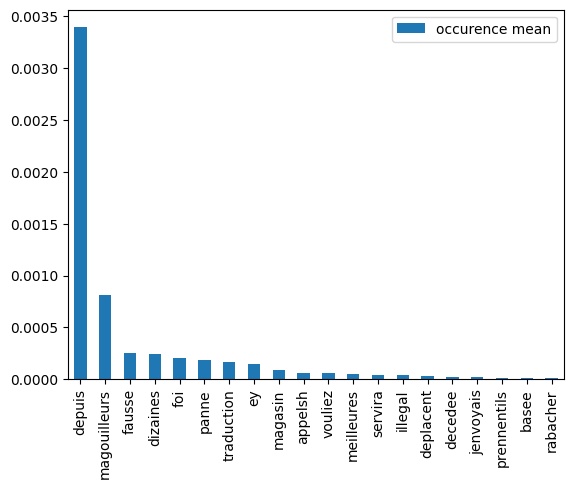

In [47]:
tfidf_mean = tfidf.mean()[:20].sort_values(ascending=False).to_frame(name='occurence mean')
tfidf_mean.plot.bar()
plt.show()

### WordCloud

In [48]:
from wordcloud import WordCloud
from PIL import Image

In [49]:
tfidf_mean = tfidf.mean().sort_values(ascending=False).to_frame(name='tfidf mean')
dict_words_tfidf = tfidf_mean[tfidf_mean['tfidf mean'] != 0].to_dict()['tfidf mean']

In [50]:
tfidf_mean.head()

,tfidf mean
tres,0.009661
service,0.008471
voleurs,0.007046
efficace,0.006096
fuir,0.005745


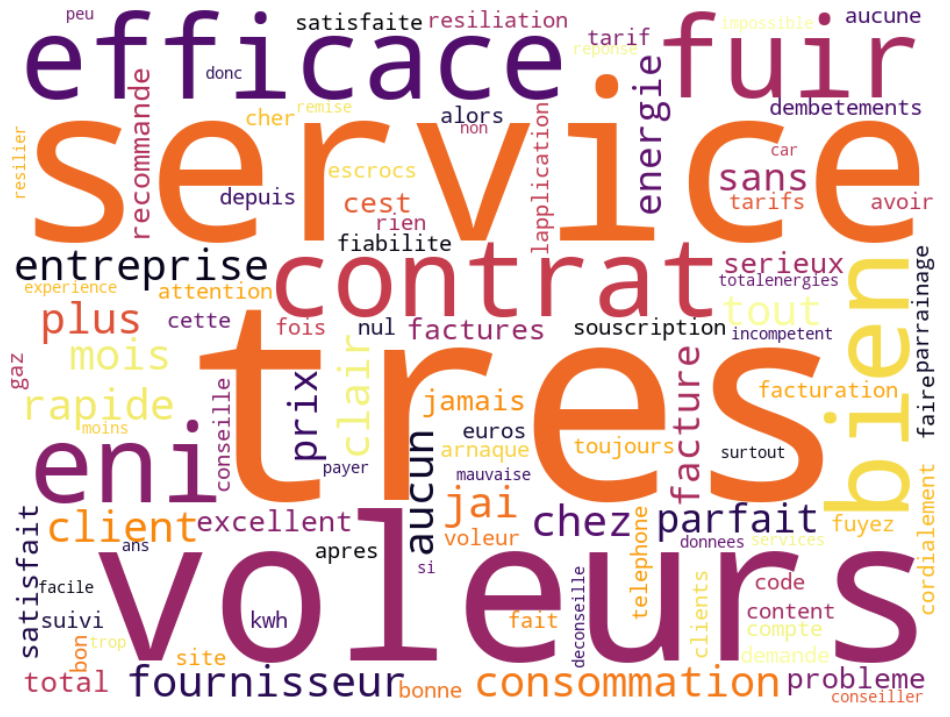

In [51]:
wordcloud = WordCloud(height=600, width=800, background_color="white", colormap='inferno', max_words=100)
wordcloud.generate_from_frequencies(frequencies=dict_words_tfidf)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### BONUS Lemmatization

In [52]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\Rehan
[nltk_data]     Ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Rehan
[nltk_data]     Ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [53]:
def clean_text(corpus, lemmatize=False, stemming=False):
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer("french")

    cleaned_corpus = []
    for text in corpus:
        tokens = word_tokenize(text)
        if lemmatize:
            tokens = [lemmatizer.lemmatize(word) for word in tokens]
        elif stemming:
            tokens = [stemmer.stem(word) for word in tokens]
        
        cleaned_text = " ".join(tokens)
        cleaned_corpus.append(cleaned_text)
    
    return cleaned_corpus

In [54]:
clean_text(df.text, stemming=True)[:3]

["catastroph énerget premi souscript avec eux en 2021 : pour la premi anné aucun régularis en 2022 à fair mont annuel 880 euros deuxiem anné 2022 factur de régularis en 2023 de 1137 euros pour un mont total de consomm de 1880 euros . j'ai essai de vérifi ma consomm sur mon espac client , je remarqu que le don affich ne sont pas cohérent ( dan un mois de l'ann j'et en vacanc , il n ' y avait person à la maison et tout le appareil était éteint ) . j'ai appel le servic client le 01/02/2023 pour avoir de expliqu , la conseiller me dis qu'el n ' a pas plus de visibil sur mon dossi , elle a demand l'intervent d'un autr servic qui au jour d'aujourd'hui ne m ' a pas rappel . une catastroph total , je regret d'avoir chois eni",
 "augment du prix de kwh x3 augment du prix de kwh x3 . le 4 derni mois équivalent à 1an de consomm habituel . aucun commun de l'entrepris . impossibl de le avoir au téléphon et aucun répons au mail . un recour est lanc par recommand et le médiateur de l'énerg ser mandat

### Bonus wordcloud

In [55]:
def plot_wordcloud(text, title=None, figure_size=(12, 8)):
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(" ".join(text))
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis("off")
    if title:
        plt.title(title)
    plt.tight_layout(pad=0)
    plt.show()

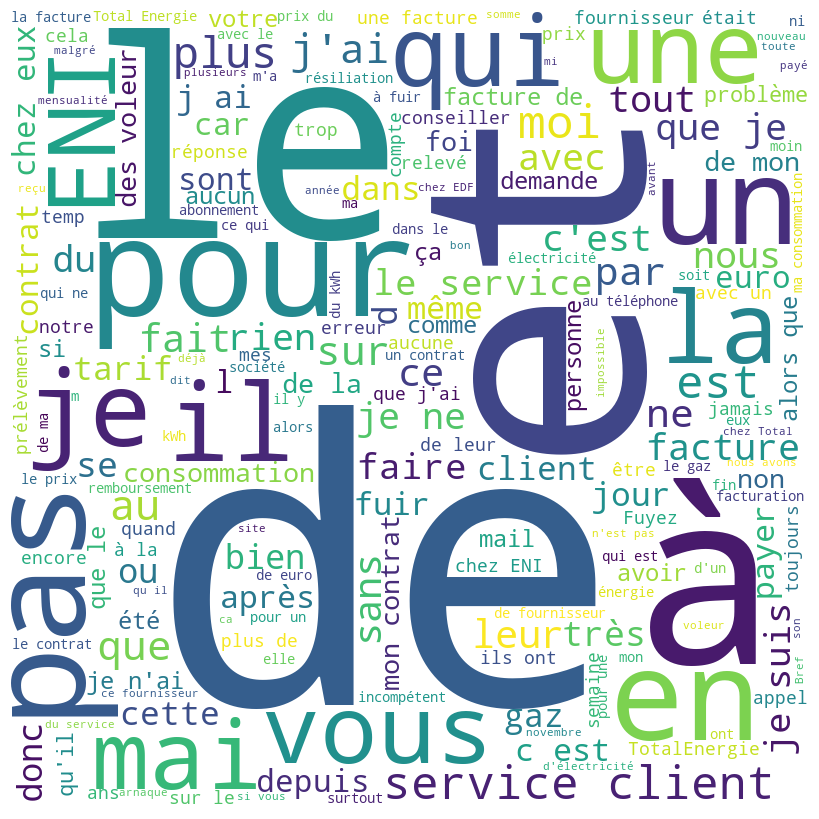

In [56]:
plot_wordcloud(df.text)

In [ ]:
df.to_csv("Final data",index=False)